In [1]:
from torchvision.models.detection import retinanet_resnet50_fpn_v2
import torch

In [3]:
model = retinanet_resnet50_fpn_v2(weights=None, weights_backbone='DEFAULT', num_classes=9)
model.load_state_dict(torch.load('retinanet_weights.pth'))
model.eval()
model.to('cuda')

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      

In [4]:
from PIL import Image
from torchvision import transforms as T

transform = T.Compose([T.ToTensor()])

image = Image.open('street-traffic-new-york-typical-street-view-manhattan-manhattan-new-york-april-92272598.jpg')
img_tensor = transform(image).to('cuda')

In [6]:
with torch.no_grad():
    predictions = model([img_tensor])

In [9]:
boxes = predictions[0]['boxes'].cpu().numpy()
labels = predictions[0]['labels'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()

In [22]:
threshold = 0.7
valid_boxes = boxes[scores > threshold]
valid_labels = labels[scores > threshold]
valid_scores = scores[scores > threshold]

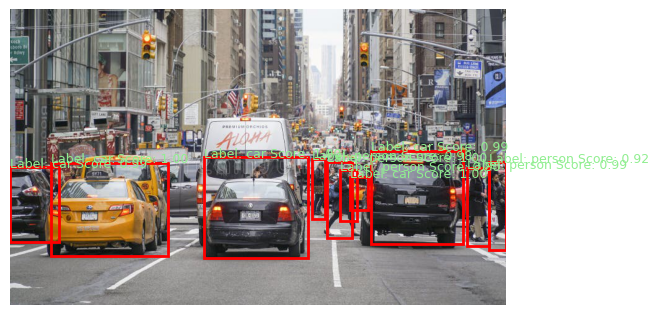

In [23]:
plt.imshow(image)
label_list = ['background','bicycle','bus','car','cng','motorcycle','other-vehicle','person','rickshaw']
for i in range(len(valid_boxes)):
    x1, y1, x2, y2 = valid_boxes[i]
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none'))
    plt.text(x1, y1, f'Label: {label_list[valid_labels[i]]} Score: {valid_scores[i]:.2f}', color='lightgreen', fontsize=9)
plt.axis('off')
plt.show()